<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Открытие-файла-и-изучение-общей-информации" data-toc-modified-id="Открытие-файла-и-изучение-общей-информации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Открытие файла и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-названий-столбцов" data-toc-modified-id="Замена-названий-столбцов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Замена названий столбцов</a></span></li><li><span><a href="#Обработка-пропусков-значений" data-toc-modified-id="Обработка-пропусков-значений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка пропусков значений</a></span></li><li><span><a href="#Поиск-дубилкатов" data-toc-modified-id="Поиск-дубилкатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Поиск дубилкатов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание


В нашем распоряжении данные о продажах компьютерных игр интернет-магазина «Стримчик» за 2016 год. Наша задача проанализировать данные и выявить определяющие успешность игры закономерности, чтобы спланировать рекламные кампании. 

описание данных:

* Name — название игры

* Platform — платформа

* Year_of_Release — год выпуска

* Genre — жанр игры

* NA_sales — продажи в Северной Америке (миллионы проданных копий)

* EU_sales — продажи в Европе (миллионы проданных копий)

* JP_sales — продажи в Японии (миллионы проданных копий)

* Other_sales — продажи в других странах (миллионы проданных копий)

* Critic_Score — оценка критиков (максимум 100)

* User_Score — оценка пользователей (максимум 10)

* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.


## Открытие файла и изучение общей информации

Для начала импортируем необходимые библиотеки и проверим что данные выгружаются без ошибок:

In [431]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [432]:
try:
    data=pd.read_csv('games.csv') 
except FileNotFoundError:
    data=pd.read_csv('/datasets/games.csv')

In [433]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


обнаружены несколько ошибок в типах переменных: нужно заменить тип файла Year_of_Release на int, десятая доля в годе выпуска игры нам не нужна. в User_Score нужно заменить на float64 чтобы все рейтинги имели тип файл float64

Так же в названиях колонок обнаружено несколько нарушений стиля: строчные буквы сочетаются с прописными.

## Предобработка данных

### Замена названий столбцов 

Переименуем названия столбцов, для удобства выведем существующие названия столбцов:

In [435]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [436]:
data = data.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'}) 

и проверим что столбцы переименовались:

In [437]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков значений

сначала посчитаем сколько в таблице пропусков

In [438]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

видно 2 пропуска в названии игры, удалим такие данные:

In [439]:
data=data.dropna(subset=['name'])

пусоты в `year_of_release` заменим на -1 чтобы было изменить тип данных на int: 

In [440]:
data['year_of_release'] = data['year_of_release'].fillna(-1)

проверим что больше нет пустот в `name` и `year_of_release`

In [441]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

и изменим тип данных на int

In [442]:
data['year_of_release']=data['year_of_release'].astype('int')

проверим что тип данных теперь int:

In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


tbd означает 'to be determined'. Заменим все tba на NaN:

In [444]:
data.loc[data['user_score'] == "tbd" , 'user_score'] = np.nan

и изменим тип переменной на float:

In [445]:
data['user_score']=data['user_score'].astype('float64')

и проверим что тип данных user_score теперь float

In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


у нас нет данных чтобы заменить пустоты в `critic_score` и `user_score`, поэтому оставим эти столбцы как есть. В `rating` указывается рейтинг от организации ESRB. Имеет смысл заменить пустоты на RP. Это означает что рейтинг ожидается.

In [447]:
data['rating']=data['rating'].fillna('RP')

проверим что в rating больше нет пустот:

In [448]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Поиск дубилкатов

займемся неявными дубликатами. Начнем с `name`

In [449]:
print(data['name'].value_counts()) 

Need for Speed: Most Wanted                                   12
Ratatouille                                                    9
FIFA 14                                                        9
LEGO Marvel Super Heroes                                       9
Madden NFL 07                                                  9
                                                              ..
Astroblast                                                     1
GrimGrimoire                                                   1
New Super Mario Bros. Wii                                      1
Warriors of the Lost Empire (JP sales)                         1
Pokémon Mystery Dungeon: Red Rescue Team (US weekly sales)     1
Name: name, Length: 11559, dtype: int64


видно что есть повторы. Разберем поподробнее строки с игрой Need for Speed: Most Wanted:

In [450]:
print(data.query('name=="Need for Speed: Most Wanted"')) 

                              name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2             2005  Racing   
523    Need for Speed: Most Wanted      PS3             2012  Racing   
1190   Need for Speed: Most Wanted     X360             2012  Racing   
1591   Need for Speed: Most Wanted     X360             2005  Racing   
1998   Need for Speed: Most Wanted       XB             2005  Racing   
2048   Need for Speed: Most Wanted      PSV             2012  Racing   
3581   Need for Speed: Most Wanted       GC             2005  Racing   
5972   Need for Speed: Most Wanted       PC             2005  Racing   
6273   Need for Speed: Most Wanted     WiiU             2013  Racing   
6410   Need for Speed: Most Wanted       DS             2005  Racing   
6473   Need for Speed: Most Wanted      GBA             2005  Racing   
11715  Need for Speed: Most Wanted       PC             2012  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

Одна игра для разных платформ это разные строки в таблице. Помимо этого в 2012 году вышел ремейк игры. Будем иметь это ввиду

продолжим и посмотрим уникальные значения `platform`

In [451]:
print(data['platform'].value_counts()) 

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


In [452]:
print(data['genre'].value_counts()) 

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


In [453]:
print(data['rating'].value_counts()) 

RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64


все выглядит хорошо. Проверим данные на явные дубликаты:

In [454]:
data.duplicated().sum()

0

Дубликатов не найдено, посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. Для этого напишем функцию:

In [455]:
def total_sales(row):
    #чтобы посчитать суммарные продажи игры нужно сложить все 4 показателя по регионам:
    total_sales=row['na_sales']+row['eu_sales']+row['jp_sales']+row['other_sales']
    return total_sales
    

In [456]:
data['total_sales'] = data.apply(total_sales, axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


## Исследовательский анализ данных

построим таблицу чтобы посмотреть сколько игр выпускалось в разные годы

In [457]:
game_year = data.groupby(['year_of_release'])['name'].agg(['count']).reset_index()

game_year.sort_values('count', ascending = False)

,year_of_release,count
29,2008,1427
30,2009,1426
31,2010,1255
28,2007,1197
32,2011,1136
27,2006,1006
26,2005,939
23,2002,829
24,2003,775
25,2004,762


больше всего игр из таблицы было выпущено в 2008 году

построим график чтобы понять в какие года вышло мало игр : 

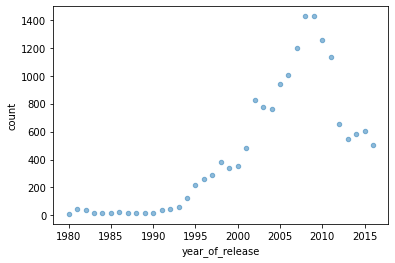

In [458]:
game_year.query('year_of_release>0').plot.scatter(x="year_of_release", y="count", alpha=0.5);

и отсортируем сводную таблицу по количеству игр по годам:

In [459]:
game_year.sort_values('year_of_release', ascending = False)

,year_of_release,count
37,2016,502
36,2015,606
35,2014,581
34,2013,544
33,2012,653
32,2011,1136
31,2010,1255
30,2009,1426
29,2008,1427
28,2007,1197


на графике и сводной таблице видно что до 1995 вышло мало игр. Эти года можно отбросить для анализа. 

Выясним как менялись продажи по платформам. Для этого выделим платформы с наибольшими суммарными продажами:

In [460]:
pivot_platform_top = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['sum','count'])
pivot_platform_top.columns = ['sum','count']
pivot_platform_top.sort_values('sum', ascending = False).head(10)

,sum,count
platform,,
PS2,1255.77,2161
X360,971.42,1262
PS3,939.65,1331
Wii,907.51,1320
DS,806.12,2151
PS,730.86,1197
GBA,317.85,822
PS4,314.14,392
PSP,294.05,1209


PS2 и X360 самые  успешные платформы. Сохраним топ 10 самых прибыльных платформ в отдельный датафрейм и заодно избавимся от "-1 "в year_of_release:

In [461]:
platform_top_name=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

data_top10_sales=data.query('(platform in @platform_top_name) and (year_of_release>1)')

Построим таблицы чтобы понять как менялись суммарные продажи для каждой из 10 платформ:

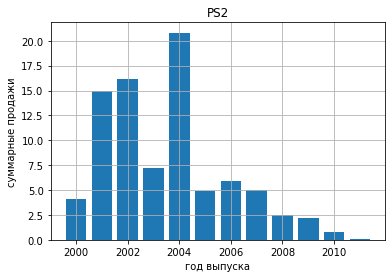

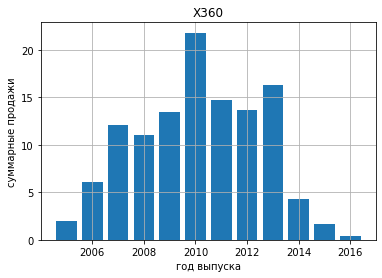

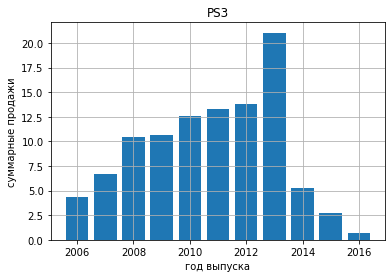

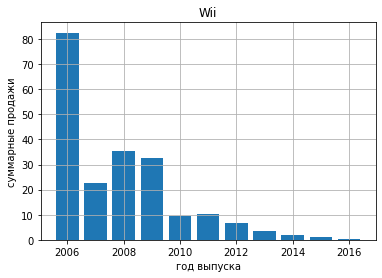

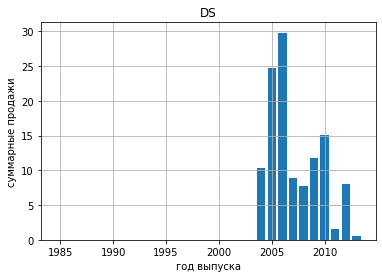

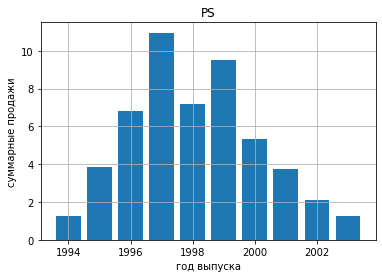

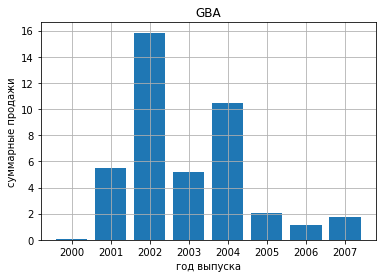

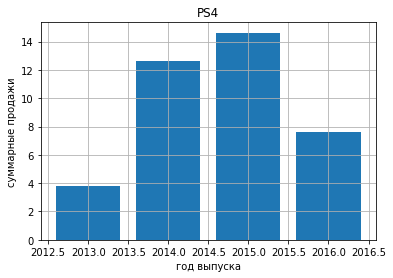

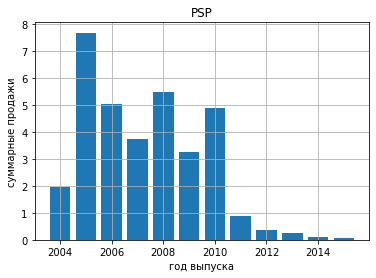

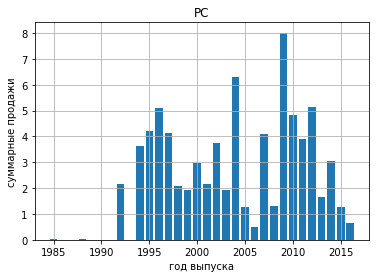

In [462]:
for platform in platform_top_name:
    groups = data_top10_sales.query('platform==@platform')['year_of_release']
    counts = data_top10_sales.query('platform==@platform')['total_sales'] 

    plt.bar(groups, counts)
    plt.title(platform)
    plt.xlabel("год выпуска")
    plt.ylabel("суммарные продажи")
    plt.grid(True)
    plt.show()

    

из таблиц видно что есть игра ~1985 года для DS, при том что DS появилась только в 2004 году. Проверим данные по DS:

In [463]:
data_top10_sales.query('year_of_release>1 and platform=="DS"')['year_of_release'].value_counts()

2008    492
2009    403
2007    376
2010    323
2006    201
2011    153
2005    118
2004     23
2012     23
2013      8
1985      1
Name: year_of_release, dtype: int64

действительно, в данные закралась ошибка, посмотрим что это за игра:

In [464]:
data_top10_sales.query('year_of_release==1985 and platform=="DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


Небольшой поиск показал что Strongest Tokyo University Shogi DS действительно вышла в 1985 году, но платформа остается неизвестной, поэтому удалим это значение из выборки и построим заново таблицы

In [465]:
data_top10_sales = data_top10_sales[data_top10_sales['name']
                        != 'Strongest Tokyo University Shogi DS']

Так же из выборки следует убрать редкие значения для PC

In [466]:
data_top10_sales.query('year_of_release>1 and platform=="PC"')['year_of_release'].value_counts()

2011    139
2009    107
2010     90
2008     76
2007     62
2012     61
2016     54
2006     52
2015     50
2014     47
2013     38
2005     37
2003     33
2004     30
2002     19
2001     15
1998      8
2000      7
1999      7
1997      6
1994      6
1992      5
1996      4
1995      2
1988      1
1985      1
Name: year_of_release, dtype: int64

уберем игры 1985 и 1988 годов:

In [467]:
data_top10_sales = data_top10_sales[data_top10_sales['year_of_release']!=1985]
data_top10_sales = data_top10_sales[data_top10_sales['year_of_release']!=1988]

и построим заново таблицы

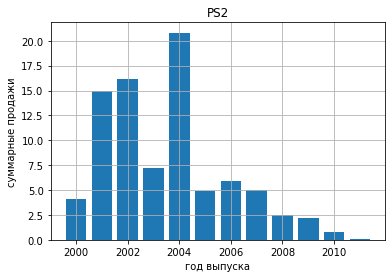

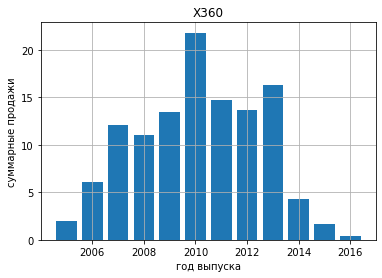

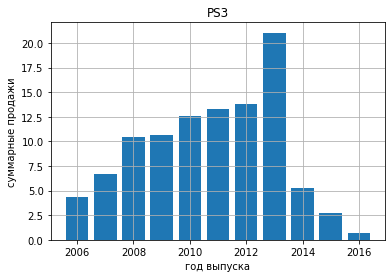

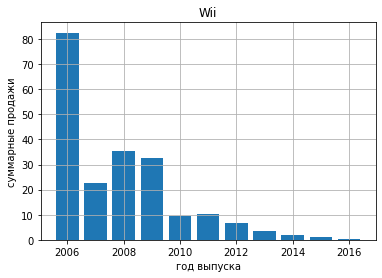

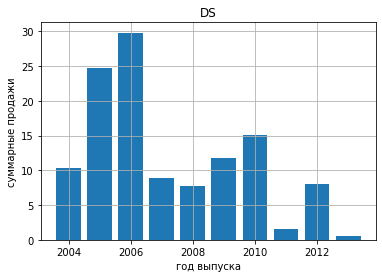

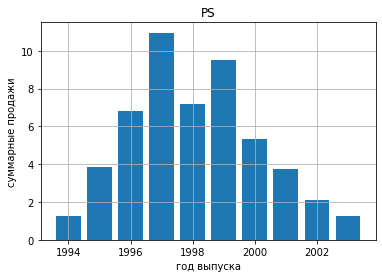

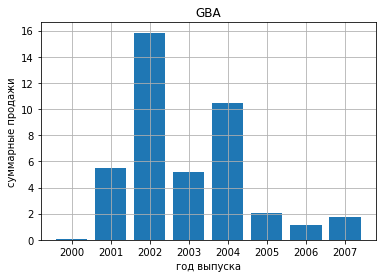

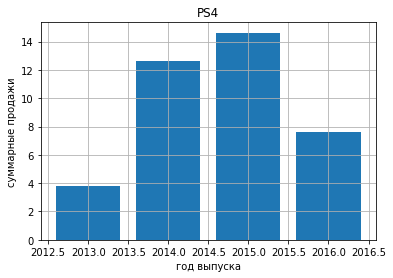

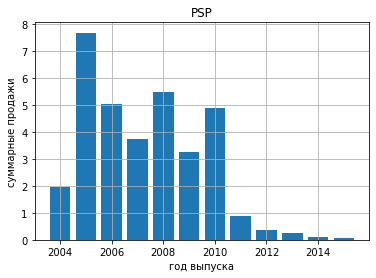

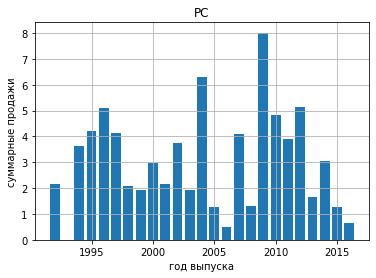

In [468]:
for platform in platform_top_name:
    groups = data_top10_sales.query('platform==@platform')['year_of_release']
    counts = data_top10_sales.query('platform==@platform')['total_sales'] 

    plt.bar(groups, counts)
    plt.title(platform)
    plt.xlabel("год выпуска")
    plt.ylabel("суммарные продажи")
    plt.grid(True)
    plt.show()

рассчитаем среднюю "длительность жизни" платформ:

In [469]:
from statistics import mean
sum = []
for platform in platform_top_name:
    item=data_top10_sales.query('year_of_release>1 and platform==@platform')['year_of_release'].value_counts().count()
    sum.append(item)
print(mean(sum))

11


построим график чтобы лучше визуализировать продажи:

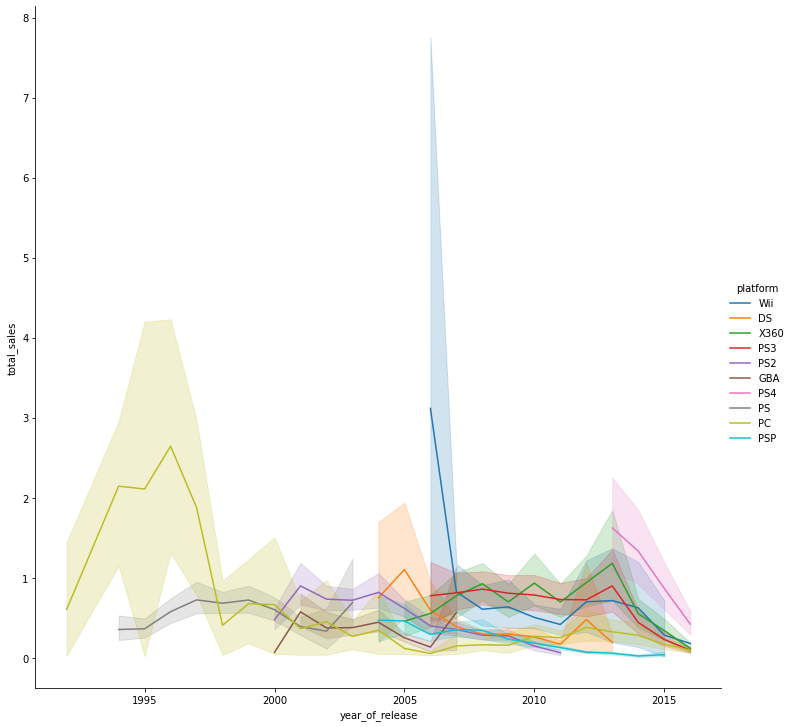

In [470]:
sns.relplot(    x='year_of_release',
                y='total_sales',
                hue='platform',
                markers=True,
                kind='line',
                data=data_top10_sales,
                height=10,
                aspect=1
                )
plt.show()

Итого:

1)средняя длительность жизни платформы 11 лет. После этого продажи игр этой платформы равны нулю

2)до 2000 года была актуальна только PS и PC:

3)в 2006 году WII показало рекордно большой показатель по продажам

4)рекордсмен по актуальности PC: с 1992 по 2016 год включительно

5)PS4 была актуальна только 4 года, но надо помнить о том что наши данные только до 2016 года.

6)После 2013 года продажи игр в целом только падают, даже если не учитывать неполный 2016 год.


За актуальный период примем период начиная с 2013 года, потому что все актуальные платформы вышли в 2013 году. Построим график только за этот период:

In [471]:
data_actual_period=data_top10_sales.query('year_of_release>2012')

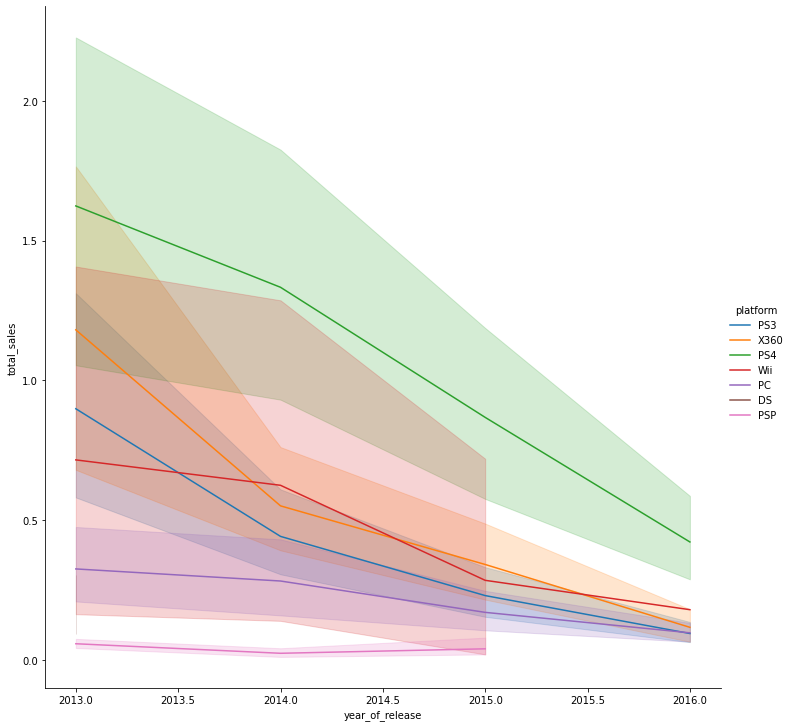

In [472]:
sns.relplot(    x='year_of_release',
                y='total_sales',
                hue='platform',
                markers=True,
                kind='line',
                data=data_actual_period,
                height=10,
                aspect=1
                )
plt.show()

как и было выше замечено все продажи игр падают, исключение составляют продажи PSP, которые хоть и малы но остаются на примерно одном уровне.

Построим «ящик с усами» по глобальным продажам игр по всем платформам за актуальный период:

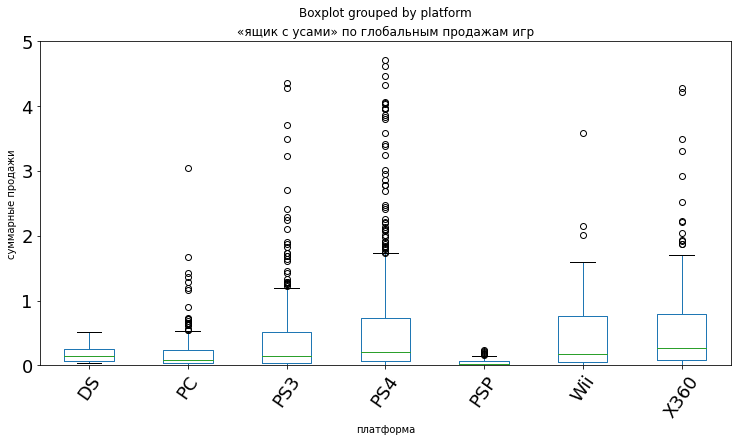

In [473]:
fig,ax = plt.subplots(figsize=(12,6))
boxplot = data_actual_period.boxplot(ax=ax,column='total_sales',by='platform', fontsize=18,grid=False, rot=55)

plt.title("«ящик с усами» по глобальным продажам игр")
plt.xlabel("платформа")
plt.ylabel("суммарные продажи")  
ax.set_ylim(0,5)
plt.show()

In [474]:
pivot_platform_top = data_actual_period.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['median','sum','count'])
pivot_platform_top.columns = ['median','sum','count']
pivot_platform_top=pivot_platform_top.sort_values('sum', ascending = False).head(10)
pivot_platform_top

,median,sum,count
platform,,,
PS4,0.200,314.14,392
PS3,0.150,181.43,345
X360,0.265,136.80,186
PC,0.080,39.43,189
Wii,0.180,13.66,23
PSP,0.020,3.50,67
DS,0.150,1.54,8


Посмотрим, как влияют на продажи PS4 отзывы пользователей и критиков.

Начнем с отзывов критиков:

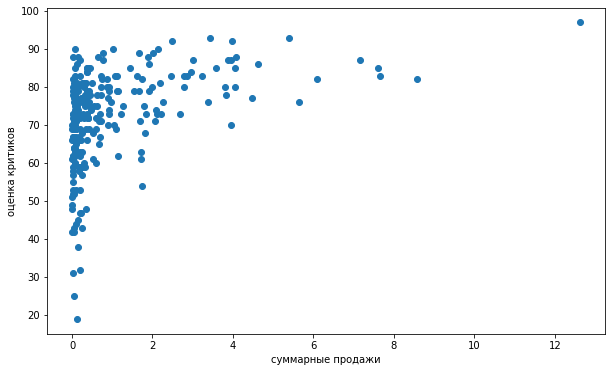

In [475]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data_actual_period.query('platform=="PS4"')['total_sales'], y = data_actual_period.query('platform=="PS4"')['critic_score'])
plt.xlabel("суммарные продажи")
plt.ylabel("оценка критиков")  

plt.show()

видно что с возрастанием оценки критиков есть небольшое увеличение продаж, посчитаем для соответствующих переменных коэффициент корреляции Пирсона

In [476]:
data_actual_period.query('platform=="PS4"')['total_sales'].corr(data_actual_period.query('platform=="PS4"')['critic_score'])

0.4065679020617816

есть довольно слабая связь между продажами PS4 и оценками критиков. По вторим аналогичные вычисления для оценки пользователей:

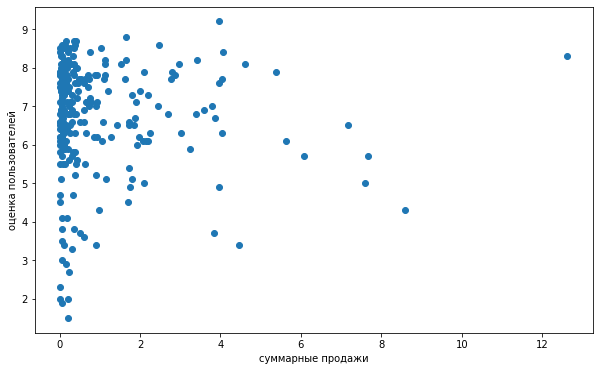

In [477]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data_actual_period.query('platform=="PS4"')['total_sales'], y = data_actual_period.query('platform=="PS4"')['user_score'])
plt.xlabel("суммарные продажи")
plt.ylabel("оценка пользователей")  

plt.show()

In [478]:
data_actual_period.query('platform=="PS4"')['total_sales'].corr(data_actual_period.query('platform=="PS4"')['user_score'])

-0.031957110204556424

Неожиданно оценка пользователей никак не влияет на сумму продаж. 

Посмотрим справедливо ли это для других платформ:

In [479]:
platform_top_name_after2012=['PS3', 'X360', 'PS4', 'Wii', 'Wii', 'PC', 'DS', 'PSP']
for platform in platform_top_name_after2012:
    print(platform,':')
    print(data_actual_period.query('platform==@platform')[['total_sales', 'critic_score','user_score']].corr())

PS3 :
              total_sales  critic_score  user_score
total_sales      1.000000      0.334285    0.002394
critic_score     0.334285      1.000000    0.599920
user_score       0.002394      0.599920    1.000000
X360 :
              total_sales  critic_score  user_score
total_sales      1.000000      0.350345   -0.011742
critic_score     0.350345      1.000000    0.520946
user_score      -0.011742      0.520946    1.000000
PS4 :
              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000
Wii :
              total_sales  critic_score  user_score
total_sales      1.000000           NaN    0.682942
critic_score          NaN           NaN         NaN
user_score       0.682942           NaN    1.000000
Wii :
              total_sales  critic_score  user_score
total_sales      1.000000           NaN    0.682942
critic_score          NaN        

для тех платформ для которых получилось посчитать коэффициент корреляции отзывы критиков влияют гораздо больше чем отзывы пользователей.

Теперь посмотрим на общее распределение игр по жанрам:

In [480]:
pivot_platform_top = data_actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum','count','median'])
pivot_platform_top.columns = ['sum','count','median']
pivot_platform_top.sort_values('median', ascending = False).head(10)

,sum,count,median
genre,,,
Shooter,165.67,138,0.395
Sports,117.55,146,0.295
Platform,16.17,33,0.180
Action,226.05,392,0.145
Fighting,17.37,52,0.140
Role-Playing,55.81,133,0.140
Simulation,11.29,39,0.110
Racing,22.64,60,0.105
Misc,37.06,67,0.080


Видно что самыми популярными жанрами являются Action и Shooter. Но Sports имеет больше игр и самое высокое медианное значение имеет жанр Shooter. Это значит что игры жанра Shooter стабильно приносят высокий доход.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы и самые популярные жанры 
Начнем c платформ:

In [481]:
pivot_platform_top = data_actual_period.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = ['sum','count'])
pivot_platform_top.columns = ['eu_sales_sum','jp_sales_sum','na_sales_sum','eu_sales_count','jp_sales_count','na_sales_count']
pivot_platform_top.sort_values('na_sales_sum', ascending = False).head(5)


,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_count,jp_sales_count,na_sales_count
platform,,,,,,
PS4,141.09,15.96,108.74,392,392,392
X360,42.52,0.51,81.66,186,186,186
PS3,67.81,23.35,63.50,345,345,345
PC,25.36,0.00,11.11,189,189,189
Wii,5.93,0.05,6.56,23,23,23


Самая популярная платформа для Северной америки PS4.

In [482]:
pivot_platform_top.sort_values('eu_sales_sum', ascending = False).head(5)

,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_count,jp_sales_count,na_sales_count
platform,,,,,,
PS4,141.09,15.96,108.74,392,392,392
PS3,67.81,23.35,63.50,345,345,345
X360,42.52,0.51,81.66,186,186,186
PC,25.36,0.00,11.11,189,189,189
Wii,5.93,0.05,6.56,23,23,23


Самая популярная платформа для Европы PS4. Топ5 приставок по Европе очень похож на топ5 по Северной Америке

In [483]:
pivot_platform_top.sort_values('jp_sales_sum', ascending = False).head(5)

,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_count,jp_sales_count,na_sales_count
platform,,,,,,
PS3,67.81,23.35,63.50,345,345,345
PS4,141.09,15.96,108.74,392,392,392
PSP,0.17,3.29,0.00,67,67,67
X360,42.52,0.51,81.66,186,186,186
Wii,5.93,0.05,6.56,23,23,23


Самая популярная платформа для PS3. Сильная разница с Европой и Америкой из-за огромной популярности компании Sony

построим графики чтобы лучше визуализировать топ5 приставок:

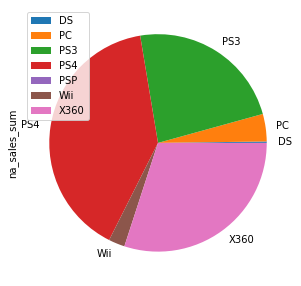

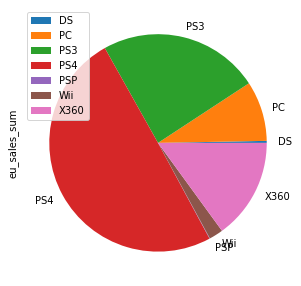

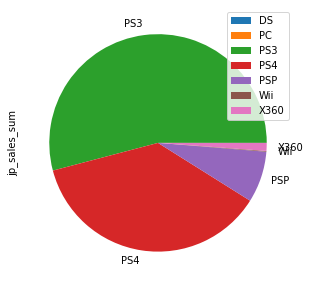

In [484]:
plot = pivot_platform_top.plot.pie(y='na_sales_sum', figsize=(5, 5))
plot = pivot_platform_top.plot.pie(y='eu_sales_sum', figsize=(5, 5))
plot = pivot_platform_top.plot.pie(y='jp_sales_sum', figsize=(5, 5))

Самый популярные платформы отличаются по регионам, в Северной америке это X360 , в Европе это PS2, а в Японии DS. PS2 фигурирует в топ5 по всем регионам.

In [485]:
pivot_top_genre = data_actual_period.pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc = ['sum','count'])
pivot_top_genre.columns = ['eu_sales_sum','jp_sales_sum','na_sales_sum','eu_sales_count','jp_sales_count','na_sales_count']
pivot_top_genre.sort_values('na_sales_sum', ascending = False).head(5)

,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_count,jp_sales_count,na_sales_count
genre,,,,,,
Action,91.38,16.52,87.71,392,392,392
Shooter,67.93,4.86,70.28,138,138,138
Sports,49.61,3.35,48.07,146,146,146
Role-Playing,19.69,9.75,19.58,133,133,133
Misc,13.07,1.35,18.30,67,67,67


В Северной Америке самый популярный жанр Avtion 

In [486]:
pivot_top_genre.sort_values('eu_sales_sum', ascending = False).head(5)

,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_count,jp_sales_count,na_sales_count
genre,,,,,,
Action,91.38,16.52,87.71,392,392,392
Shooter,67.93,4.86,70.28,138,138,138
Sports,49.61,3.35,48.07,146,146,146
Role-Playing,19.69,9.75,19.58,133,133,133
Racing,13.33,0.88,5.32,60,60,60


Европа мало чем отличается от Северной Америки в плане любимых жанров

In [487]:
pivot_top_genre.sort_values('jp_sales_sum', ascending = False).head(5)

,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_count,jp_sales_count,na_sales_count
genre,,,,,,
Action,91.38,16.52,87.71,392,392,392
Role-Playing,19.69,9.75,19.58,133,133,133
Shooter,67.93,4.86,70.28,138,138,138
Sports,49.61,3.35,48.07,146,146,146
Fighting,5.03,3.07,7.06,52,52,52


Асtion любят во всех странах. В Японии гораздо больше популярен жанр RPG

Проверим ли влияет ли рейтинг ESRB на продажи в регионах, для этого переведем строковые значения `rating` в цифровые где чем выше тем для более большого возраста подходит игра.

In [488]:
def rating_to_num(rating): 
    if rating=='RP':
        return 0
    if rating=='E' :
        return 1
    if rating=='K-A':
        return 1
    #рейтинг K-A это ретинг E для игр 1994–1998 годов
    if rating=='E10+':
        return 2
    if rating=='T':
        return 3
    if rating=='M':
        return 4
    if rating=='AO':
        return 5
    if rating=='EC':
        return 0
    #рейтинг EC означает что игра подходит для детей от 3 лет и более не используется, определим его в 0 потому что 1 это E, для детей 6 лет. 
data_actual_period['rating_num']=data_actual_period['rating'].apply(rating_to_num)

/tmp/ipykernel_58/1592777834.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual_period['rating_num']=data_actual_period['rating'].apply(rating_to_num)


проверим что все значения успешно поменялись

In [489]:
print(data_actual_period['rating_num'].value_counts().sum())

1210


In [490]:
print(data_actual_period['rating'].value_counts().sum()) 

1210


и Посмотрим как рейтинг влияет на продажи игр в разных странах:

In [491]:
pivot_top_genre = data_actual_period.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = ['sum','count'])
pivot_top_genre.columns = ['eu_sales_sum','jp_sales_sum','na_sales_sum','eu_sales_count','jp_sales_count','na_sales_count']
pivot_top_genre.sort_values('jp_sales_sum', ascending = False).head(15)

,eu_sales_sum,jp_sales_sum,na_sales_sum,eu_sales_count,jp_sales_count,na_sales_count
rating,,,,,,
RP,47.38,18.33,45.41,436,436,436
M,119.60,11.17,116.99,256,256,256
T,33.33,10.04,34.32,211,211,211
E,56.24,2.72,43.58,179,179,179
E10+,27.18,0.90,31.84,128,128,128


В Японии чаще всего покупают игры без рейтинга, потому что организация ESRB в первую очередь оценивает только игры США и Канады и поэтому игры популярные в Японии часто остаются без рейтинга. 
Если не учитывать игры без рейтинга то в Европе и Северной Америке наибольшей популярностью пользуются игры M(17+) и E. В Японии M и T.

## Проверка гипотез

проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковы".
За нулевую гипотезу примем утверждение "Средние пользовательские рейтинги платформ Xbox One и PC равны"
За альтернативную примем "Средние пользовательские рейтинги платформ Xbox One и PC неравны"

но сначала избавимся от пустот в user_score:

In [492]:
data_actual_period['user_score'].isna().sum()

459

In [493]:
#data_actual_period['user_score'] = ~data_actual_period['user_score'].isna()
data_actual_period=data_actual_period.dropna(subset=['user_score'])

In [494]:
data_actual_period['user_score'].isna().sum()

0

критический уровень статистической значимости зададим равным 0.05

так как рейтинги платформ Xbox One и PC это независимые генеральные совокупности используем метод scipy.stats.ttest_ind

In [495]:
Xbox_ratings =  data_actual_period.query('platform == "X360"')['user_score']
PC_ratings =  data_actual_period.query('platform == "PC"')['user_score']

alpha = 0.05 

results = st.ttest_ind(
    Xbox_ratings, 
    PC_ratings)


print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15705535885466557
Не получилось отвергнуть нулевую гипотезу


проверка гипотезы показывает что мы не можем отбросить нулевую гипотезу о равенстве рейтингов пользовательских рейтингов платформ Xbox One и PC

проверим так же гипотезу Средние пользовательские рейтинги жанров Action и Sports разные.

За нулевую гипотезу примем утверждение "Средние пользовательские рейтинги жанров Action и Sports равны"
За альтернативную примем "Средние пользовательские рейтинги жанров Action и Sports неравны"

In [496]:
Action_ratings =  data_actual_period.query('genre == "Action"')['user_score']
Sports_ratings =  data_actual_period.query('genre == "Sports"')['user_score']

alpha = 0.05 

results = st.ttest_ind(
    Action_ratings, 
    Sports_ratings)


print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.0521384521695691e-19
Отвергаем нулевую гипотезу


проверка гипотезы показывает что равенство пользовательских рейтингов жанров очень маловероятно.

## Общий вывод

В ходе работы мы исследовали  данные интернет-магазина "Стримчик". Мы привели данные к нужным типам и к принятым названиям столбцов. Также мы проанализировали данные на предмет пропусков и по возможности заменили их. Были рассчитаны суммарные продажи во всех регионах для всех игр. Получены сводные таблицы для визуализации наиболее популярых платформ и определения в какие года было куплено больше всего игр. Для всех платформ были построены столбчатые диаграммы, чтобы понять как менялись продажи. В итоге было рассчитано, что платформы "живут" на рынке в среднем 11 лет. В 2006 году Wii показала рекордно большой показатель по продажам. PС является рекордсменом по актуальности: игры этой платформы покупаются с 1992 года. После 2013 года продажи игр только падают, что говорит о кризисе игровой индустрии. Даже если не учитывать 2016 год, по которому в наличии нет всех данных, можно предсказать дальнейшее падение продаж в 2017 году.
Построены "ящики с усами" по продажам для всех платформ. Для всех платформ есть игры с аномально высокими продажами.
Также было показано, что отзывы критиков влияют горадо больше на продажи игр, чем отзывы игроков по всем платформам. Продажи в Европе и в Северной Америке сильно отличаются от продаж в Японии по платформам из-за большой популярности платформ компании Sony в Японии. Так же в Японии самый популярный жанр RPG, а в Европе и в Северной Америке самые популярные жанры Action, Sports и Shooter. На продажи практически никак не влияет рейтинг от организации ESRB. Проверка статистических гипотез показала равенство пользовательских рейтингов платформ Xbox One и PC, а равенство пользовательских рейтингов жанров маловероятно.

Чтобы спланировать рекламные кампании магазину «Стримчик» рекомендуется сделать ставку на игры жанров Action, Shooter, Sports, платформы PS4. Рекомендуется так же продавать игры с высокой оценкой от критиков и возрастным рейтингом M. Следует так же учесть что в 2017 году ожидается падение продаж игр в целом.

